In [1]:
import sys
import os

sys.path.append(os.path.abspath(".."))

from analysis.Base import AnalysisBase
from analysis.Surface import InterdigitationAnalysis

from analysis import Surface

import MDAnalysis as mda
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import sys
import seaborn as sns
import pickle
import sys



In [2]:
u = mda.Universe('../../../../../mlx_v2/6.6_2.gro', '../../../../../mlx_v2/old_trajs/rep1_skip10.xtc')

In [3]:
import pickle

Continued testing parameters

In [3]:
def plot_interdigitation_summary(results: dict, title_suffix: str = ""):
    import matplotlib.pyplot as plt

    inter_total = results["inter"]["total"]
    inter_strong = results["inter"]["strong"]
    inter_weak = results["inter"]["weak"]
    trio_to_pl = results["ratio"]["trio-to-pl"]

    fig, axs = plt.subplots(2, 2, figsize=(5, 5), constrained_layout=True)

    axs[0, 0].plot(inter_total[:, 0], inter_total[:, 1], color='black')
    axs[0, 0].set_title(f"Total Interdigitation {title_suffix}")
    
    axs[0, 1].plot(inter_strong[:, 0], inter_strong[:, 1], color='blue')
    axs[0, 1].set_title(f"Strong Interdigitation {title_suffix}")
    
    axs[1, 0].plot(inter_weak[:, 0], inter_weak[:, 1], color='red')
    axs[1, 0].set_title(f"Weak Interdigitation {title_suffix}")
    
    axs[1, 1].plot(trio_to_pl[:, 0], trio_to_pl[:, 1], color='green')
    axs[1, 1].set_title(f"TRIO to PL Ratio {title_suffix}")

    for ax in axs.flat:
        ax.set_xlabel("Time (ns)")
        ax.grid(True)

    axs[0, 0].set_ylabel("nm")
    axs[1, 0].set_ylabel("nm")
    axs[1, 1].set_ylabel("Ratio")

    plt.show()


InterdigitationAnalysis: 100%|████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.61it/s]


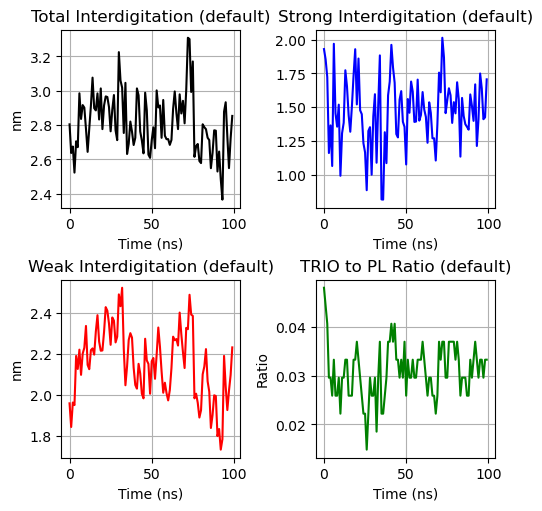

InterdigitationAnalysis: 100%|████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.38it/s]


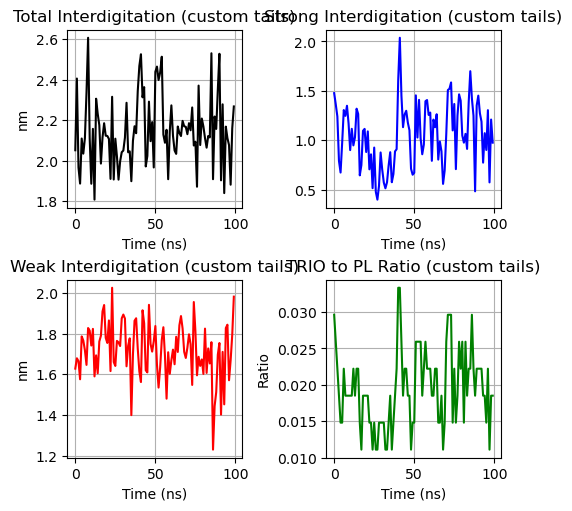

InterdigitationAnalysis: 100%|████████████████████████████████████████████████████████| 100/100 [00:10<00:00,  9.77it/s]


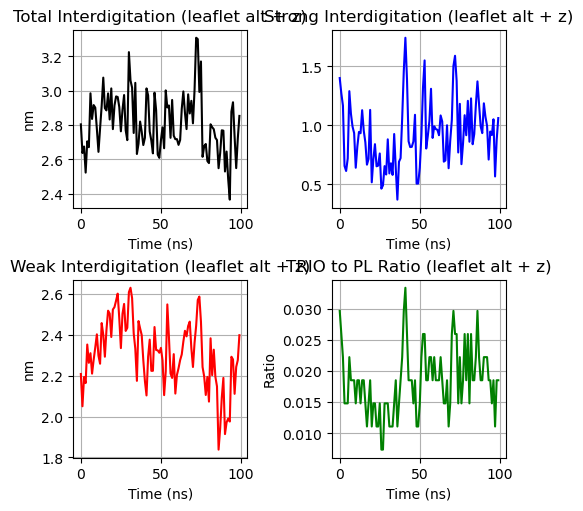

In [4]:
# Example 1: default test
analysis1 = InterdigitationAnalysis(u, ['POPC'], 'TRIO', 'TIP3', start=0, stop=100)
results1 = analysis1.run().results
plot_interdigitation_summary(results1, title_suffix="(default)")

# Example 2: custom tail atoms
custom_tails = [f"C3{i}" for i in range(2, 10)]
analysis2 = InterdigitationAnalysis(u, ['POPC'], 'TRIO', 'TIP3', tail_atoms=custom_tails, start=0, stop=100)
results2 = analysis2.run().results
plot_interdigitation_summary(results2, title_suffix="(custom tails)")

# Example 3: adjust leaflet property
analysis3 = InterdigitationAnalysis(u, ['POPC'], 'TRIO', 'TIP3', leaflet_property="prop z", use_ls2=True, use_us2=True, start=0, stop=100)
results3 = analysis3.run().results
plot_interdigitation_summary(results3, title_suffix="(leaflet alt + z)")
